In [1]:
import pandas as pd 
from tamil import utf8
import re
import ast
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#data=pd.read_csv('first20000.csv')
data=pd.read_csv('wikitamil-Copy1.csv')
tamil_char=pd.read_excel('tamil_che_up.xlsx') # list for tamil char 

In [3]:
#during crawlling thr has to been empty list
data['property1_list']=data['property1_list'].replace(to_replace='[]',value=math.nan)
data=data.dropna() #drop all index with nan value
data=data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [4]:
#converting the str in DF back to list
data['meta_name']=data['meta_name'].apply(ast.literal_eval)
data['property1_list']=data['property1_list'].apply(ast.literal_eval)

In [5]:
data['abstract']=data['abstract'].map(str)
abst=data['abstract'].tolist()
tamil_char=tamil_char['char'].tolist()
tamil_char.sort()

In [6]:
tamil_char_str="".join(tamil_char)

In [7]:
tamil_char_str

'ஃஅஆஇஈஉஊஎஏஐஒஓஔககாகிகீகுகூகெகேகைகொகோகௌக்க்ஷக்ஷாக்ஷிக்ஷீக்ஷுக்ஷூக்ஷெக்ஷேக்ஷைக்ஷொக்ஷோக்ஷௌக்ஷ்ஙஙாஙிஙீஙுஙூஙெஙேஙைஙொஙோஙௌங்சசாசிசீசுசூசெசேசைசொசோசௌச்ஜஜாஜிஜீஜுஜூஜெஜேஜைஜொஜோஜௌஜ்ஞஞாஞிஞீஞுஞூஞெஞேஞைஞொஞோஞௌஞ்டடாடிடீடுடூடெடேடைடொடோடௌட்ணணாணிணீணுணூணெணேணைணொணோணௌண்ததாதிதீதுதூதெதேதைதொதோதௌத்நநாநிநீநுநூநெநேநைநொநோநௌந்னனானினீனுனூனெனேனைனொனோனௌன்பபாபிபீபுபூபெபேபைபொபோபௌப்மமாமிமீமுமூமெமேமைமொமோமௌம்யயாயியீயுயூயெயேயையொயோயௌய்ரராரிரீருரூரெரேரைரொரோரௌர்றறாறிறீறுறூறெறேறைறொறோறௌற்லலாலிலீலுலூலெலேலைலொலோலௌல்ளளாளிளீளுளூளெளேளைளொளோளௌள்ழழாழிழீழுழூழெழேழைழொழோழௌழ்வவாவிவீவுவூவெவேவைவொவோவௌவ்ஶஶாஶிஶீஶுஶூஶெஶேஶைஶொஶோஶௌஶ்ஷஷாஷிஷீஷுஷூஷெஷேஷைஷொஷோஷௌஷ்ஸஸாஸிஸீஸுஸூஸெஸேஸைஸொஸோஸௌஸ்ஹஹாஹிஹீஹுஹூஹெஹேஹைஹொஹோஹௌஹ்'

In [8]:
len(abst)

65473

In [9]:
#creating a char2index dict
tamil_char2index={}
count=0
for i in tamil_char:
    count+=1
    tamil_char2index[i]=count

In [10]:
#adding numbers to the char2index dict
for i in range(0,10):
    tamil_char2index[str(i)]=330

In [11]:
#char2index dict
#tamil_char2index

In [12]:
def ch2id(word):
    letters = utf8.get_letters(word)
    temp=[]
    for letter in letters:
        if letter in tamil_char2index:
            temp.append(tamil_char2index[letter])
        else:
            temp.append(400) #400 = unk
    return temp

In [13]:
def char2wd(sentence):
    sentence=sentence.split()
    return [ch2id(word) for word in sentence]

In [14]:
tamil_sa=abst[1].split()

In [15]:
tamil_sa

['குறிப்பிடத்தக்க', 'கட்டிடக்கலைஞர்களின்', 'பட்டியல்']

In [16]:
ch2id(tamil_sa[1])

[14, 104, 94, 92, 26, 14, 230, 79, 208, 14, 237, 156]

In [17]:
char2wd(abst[1])

[[18, 211, 169, 159, 92, 130, 118, 26, 14],
 [14, 104, 94, 92, 26, 14, 230, 79, 208, 14, 237, 156],
 [157, 104, 94, 183, 234]]

In [18]:
to_clean=abst[34]

In [19]:
to_clean='ஆரியச் சக்கரவர்த்திகள் என்பது, இலங்கைத் தீவின் வட பாகத்திலிருந்த யாழ்ப்பாண இராச்சியத்தை 13 ஆம் நூற்றாண்டு தொடக்கம் 17ஆம் நூற்றாண்டு முற்பகுதி வரை ஆண்ட அரச வம்சத்து மன்னர்களைக் குறிக்கும். இவ்வம்சத்தின் தோற்றம் பற்றியோ இவர்கள் எங்கிருந்து வந்தார்கள் என்பது பற்றியோ எல்லோரும் ஏற்றுக்கொள்ளக்கூடிய தகவல்கள் ஏதும் இல்லை. பெரும்பாலும் இவர்கள் முதலாம் மாறவர்மன் குலசேகர பாண்டியன் என்ற பாண்டிய மன்னனின் அமைச்சர் ஆரியச் சக்கரவர்த்தி வழி வந்தவர்களே என்று கூறப்பட்டாலும்[1] மாற்றுக் கருத்துகளும் உள்ளன. இவ்வரசைத் தொடங்கிய கூழங்கைச் சக்கரவர்த்தி தென்னன் நிகரானவன் என்று போற்றப்படுவதால் இது பாண்டியர் ஆணை கீழ் நட்ந்த இராச்சியம் என்பது பெரும்பாலானோர் கருத்து.[2][3] யாழ்ப்பாணத்தின் வரலாறு பற்றிக் கூறும் வையாபாடல், யாழ்ப்பாண வைபவமாலை போன்ற நூல்கள், யாழ்ப்பாண அரசு அரசனில்லாது இருந்தபொழுது, தமிழ்நாட்டிலிருந்து அழைத்துவரப்பட்ட இளவரசனாலேயே இந்த வம்சம் ஆரம்பித்துவைக்கப் பட்டதாகக் கூறுகின்றன.'

In [20]:
to_clean

'ஆரியச் சக்கரவர்த்திகள் என்பது, இலங்கைத் தீவின் வட பாகத்திலிருந்த யாழ்ப்பாண இராச்சியத்தை 13 ஆம் நூற்றாண்டு தொடக்கம் 17ஆம் நூற்றாண்டு முற்பகுதி வரை ஆண்ட அரச வம்சத்து மன்னர்களைக் குறிக்கும். இவ்வம்சத்தின் தோற்றம் பற்றியோ இவர்கள் எங்கிருந்து வந்தார்கள் என்பது பற்றியோ எல்லோரும் ஏற்றுக்கொள்ளக்கூடிய தகவல்கள் ஏதும் இல்லை. பெரும்பாலும் இவர்கள் முதலாம் மாறவர்மன் குலசேகர பாண்டியன் என்ற பாண்டிய மன்னனின் அமைச்சர் ஆரியச் சக்கரவர்த்தி வழி வந்தவர்களே என்று கூறப்பட்டாலும்[1] மாற்றுக் கருத்துகளும் உள்ளன. இவ்வரசைத் தொடங்கிய கூழங்கைச் சக்கரவர்த்தி தென்னன் நிகரானவன் என்று போற்றப்படுவதால் இது பாண்டியர் ஆணை கீழ் நட்ந்த இராச்சியம் என்பது பெரும்பாலானோர் கருத்து.[2][3] யாழ்ப்பாணத்தின் வரலாறு பற்றிக் கூறும் வையாபாடல், யாழ்ப்பாண வைபவமாலை போன்ற நூல்கள், யாழ்ப்பாண அரசு அரசனில்லாது இருந்தபொழுது, தமிழ்நாட்டிலிருந்து அழைத்துவரப்பட்ட இளவரசனாலேயே இந்த வம்சம் ஆரம்பித்துவைக்கப் பட்டதாகக் கூறுகின்றன.'

In [21]:
def tamil_rm(sentences):
    pattern = r'\(.*?\)'
    pattern1 = r'\[.*?\]'
    pattern2 = r"[A-Za-z.,:]"
    pattern3 = r'[^ஃஅஆஇஈஉஊஎஏஐஒஓஔககாகிகீகுகூகெகேகைகொகோகௌக்க்ஷக்ஷாக்ஷிக்ஷீக்ஷுக்ஷூக்ஷெக்ஷேக்ஷைக்ஷொக்ஷோக்ஷௌக்ஷ்ஙஙாஙிஙீஙுஙூஙெஙேஙைஙொஙோஙௌங்சசாசிசீசுசூசெசேசைசொசோசௌச்ஜஜாஜிஜீஜுஜூஜெஜேஜைஜொஜோஜௌஜ்ஞஞாஞிஞீஞுஞூஞெஞேஞைஞொஞோஞௌஞ்டடாடிடீடுடூடெடேடைடொடோடௌட்ணணாணிணீணுணூணெணேணைணொணோணௌண்ததாதிதீதுதூதெதேதைதொதோதௌத்நநாநிநீநுநூநெநேநைநொநோநௌந்னனானினீனுனூனெனேனைனொனோனௌன்பபாபிபீபுபூபெபேபைபொபோபௌப்மமாமிமீமுமூமெமேமைமொமோமௌம்யயாயியீயுயூயெயேயையொயோயௌய்ரராரிரீருரூரெரேரைரொரோரௌர்றறாறிறீறுறூறெறேறைறொறோறௌற்லலாலிலீலுலூலெலேலைலொலோலௌல்ளளாளிளீளுளூளெளேளைளொளோளௌள்ழழாழிழீழுழூழெழேழைழொழோழௌழ்வவாவிவீவுவூவெவேவைவொவோவௌவ்ஶஶாஶிஶீஶுஶூஶெஶேஶைஶொஶோஶௌஶ்ஷஷாஷிஷீஷுஷூஷெஷேஷைஷொஷோஷௌஷ்ஸஸாஸிஸீஸுஸூஸெஸேஸைஸொஸோஸௌஸ்ஹஹாஹிஹீஹுஹூஹெஹேஹைஹொஹோஹௌஹ்1234567890\s\b\t]'
    sentences=re.sub(pattern,' ', sentences)
    sentences=re.sub(pattern1,' ', sentences)
    sentences=re.sub(pattern2,' ', sentences)
    sentences=re.sub(pattern3,' ', sentences)
    return sentences

In [22]:
#this cleaned version doesnot contain (.)period
tamil_rm(to_clean)

'ஆரியச் சக்கரவர்த்திகள் என்பது  இலங்கைத் தீவின் வட பாகத்திலிருந்த யாழ்ப்பாண இராச்சியத்தை 13 ஆம் நூற்றாண்டு தொடக்கம் 17ஆம் நூற்றாண்டு முற்பகுதி வரை ஆண்ட அரச வம்சத்து மன்னர்களைக் குறிக்கும்  இவ்வம்சத்தின் தோற்றம் பற்றியோ இவர்கள் எங்கிருந்து வந்தார்கள் என்பது பற்றியோ எல்லோரும் ஏற்றுக்கொள்ளக்கூடிய தகவல்கள் ஏதும் இல்லை  பெரும்பாலும் இவர்கள் முதலாம் மாறவர்மன் குலசேகர பாண்டியன் என்ற பாண்டிய மன்னனின் அமைச்சர் ஆரியச் சக்கரவர்த்தி வழி வந்தவர்களே என்று கூறப்பட்டாலும்  மாற்றுக் கருத்துகளும் உள்ளன  இவ்வரசைத் தொடங்கிய கூழங்கைச் சக்கரவர்த்தி தென்னன் நிகரானவன் என்று போற்றப்படுவதால் இது பாண்டியர் ஆணை கீழ் நட்ந்த இராச்சியம் என்பது பெரும்பாலானோர் கருத்து    யாழ்ப்பாணத்தின் வரலாறு பற்றிக் கூறும் வையாபாடல்  யாழ்ப்பாண வைபவமாலை போன்ற நூல்கள்  யாழ்ப்பாண அரசு அரசனில்லாது இருந்தபொழுது  தமிழ்நாட்டிலிருந்து அழைத்துவரப்பட்ட இளவரசனாலேயே இந்த வம்சம் ஆரம்பித்துவைக்கப் பட்டதாகக் கூறுகின்றன '

In [23]:
tamil_rm(to_clean).split()

['ஆரியச்',
 'சக்கரவர்த்திகள்',
 'என்பது',
 'இலங்கைத்',
 'தீவின்',
 'வட',
 'பாகத்திலிருந்த',
 'யாழ்ப்பாண',
 'இராச்சியத்தை',
 '13',
 'ஆம்',
 'நூற்றாண்டு',
 'தொடக்கம்',
 '17ஆம்',
 'நூற்றாண்டு',
 'முற்பகுதி',
 'வரை',
 'ஆண்ட',
 'அரச',
 'வம்சத்து',
 'மன்னர்களைக்',
 'குறிக்கும்',
 'இவ்வம்சத்தின்',
 'தோற்றம்',
 'பற்றியோ',
 'இவர்கள்',
 'எங்கிருந்து',
 'வந்தார்கள்',
 'என்பது',
 'பற்றியோ',
 'எல்லோரும்',
 'ஏற்றுக்கொள்ளக்கூடிய',
 'தகவல்கள்',
 'ஏதும்',
 'இல்லை',
 'பெரும்பாலும்',
 'இவர்கள்',
 'முதலாம்',
 'மாறவர்மன்',
 'குலசேகர',
 'பாண்டியன்',
 'என்ற',
 'பாண்டிய',
 'மன்னனின்',
 'அமைச்சர்',
 'ஆரியச்',
 'சக்கரவர்த்தி',
 'வழி',
 'வந்தவர்களே',
 'என்று',
 'கூறப்பட்டாலும்',
 'மாற்றுக்',
 'கருத்துகளும்',
 'உள்ளன',
 'இவ்வரசைத்',
 'தொடங்கிய',
 'கூழங்கைச்',
 'சக்கரவர்த்தி',
 'தென்னன்',
 'நிகரானவன்',
 'என்று',
 'போற்றப்படுவதால்',
 'இது',
 'பாண்டியர்',
 'ஆணை',
 'கீழ்',
 'நட்ந்த',
 'இராச்சியம்',
 'என்பது',
 'பெரும்பாலானோர்',
 'கருத்து',
 'யாழ்ப்பாணத்தின்',
 'வரலாறு',
 'பற்றிக்',
 'கூறும்',
 'வையாபாடல்',
 'யாழ்ப்பா

In [24]:
char2wd(tamil_rm(to_clean))

[[3, 198, 183, 65],
 [53, 26, 14, 196, 261, 208, 130, 120, 14, 247],
 [8, 156, 157, 122],
 [4, 222, 52, 22, 130],
 [121, 263, 156],
 [261, 92],
 [158, 14, 130, 120, 224, 200, 143, 118],
 [184, 260, 169, 158, 105],
 [4, 197, 65, 55, 183, 130, 126],
 [330, 330],
 [3, 182],
 [136, 221, 210, 117, 96],
 [127, 92, 26, 14, 182],
 [330, 330, 3, 182],
 [136, 221, 210, 117, 96],
 [174, 221, 157, 18, 120],
 [261, 204],
 [3, 117, 92],
 [2, 196, 53],
 [261, 182, 53, 130, 122],
 [170, 156, 144, 208, 14, 243, 26],
 [18, 211, 26, 18, 182],
 [4, 273, 261, 182, 53, 130, 120, 156],
 [128, 221, 209, 182],
 [157, 221, 211, 193],
 [4, 261, 208, 14, 247],
 [8, 52, 16, 200, 143, 122],
 [261, 143, 119, 208, 14, 247],
 [8, 156, 157, 122],
 [157, 221, 211, 193],
 [8, 234, 232, 200, 182],
 [9, 221, 213, 26, 23, 247, 235, 26, 19, 94, 183],
 [118, 14, 261, 234, 14, 247],
 [9, 122, 182],
 [4, 234, 230],
 [163, 200, 182, 158, 226, 182],
 [4, 261, 208, 14, 247],
 [174, 118, 223, 182],
 [171, 209, 261, 208, 170, 156],


In [25]:
data['clean_abs']=data['abstract'].map(tamil_rm)

In [26]:
clean_list=data['clean_abs'].tolist()

In [27]:
#joining all the abstract to get find the size of the words
joined_list="".join(clean_list)

In [28]:
#total no of words
len(joined_list.split())

1855722

In [29]:
allwords=joined_list.split()

In [30]:
#uniq_no of words
uniq_word=list((set((joined_list.split()))))

In [31]:
#no of uniq words
len(uniq_word)

240527

In [32]:
uniq_word[-1]

'பக்கங்களாகக்'

In [33]:
count_list=list(map(len,allwords))

In [34]:
len_ = sum(count_list)

## Histogram

In [35]:
#word_len count
hist = [(x,count_list.count(x)) for x in set(count_list)]

In [36]:
hist

[(1, 19853),
 (2, 56901),
 (3, 115831),
 (4, 168775),
 (5, 166238),
 (6, 213350),
 (7, 208827),
 (8, 180106),
 (9, 147503),
 (10, 130831),
 (11, 124048),
 (12, 92125),
 (13, 84750),
 (14, 45008),
 (15, 31863),
 (16, 20096),
 (17, 18232),
 (18, 13018),
 (19, 6190),
 (20, 5114),
 (21, 2334),
 (22, 2203),
 (23, 773),
 (24, 498),
 (25, 742),
 (26, 284),
 (27, 87),
 (28, 53),
 (29, 29),
 (30, 33),
 (31, 13),
 (32, 6),
 (33, 3),
 (34, 2),
 (35, 1),
 (37, 1),
 (43, 1)]

In [37]:
total_ = sum([ b for _,b in hist ])
print('<= {} : {}% of vocabulary'.format(
    20,
    100.* sum([b for a,b in hist if a <=20])/total_
))

<= 20 : 99.61939342207508% of vocabulary


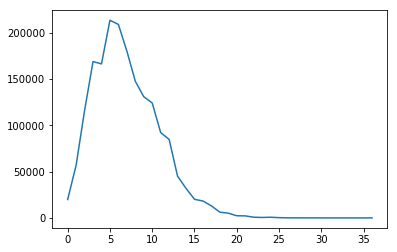

In [38]:
plt.plot([i[1] for i in hist])
plt.show()

In [39]:
sorted_uniq_words = sorted(uniq_word, key=lambda x : len(x), reverse=True)

In [40]:
[ (w, len(w)) for w in sorted_uniq_words[:200] ]

[('கண்டறிந்தார்புரோமோகுளோரோபுளோரோவயோடோமீத்தேன்', 43),
 ('தெரிவுசெய்யப்பட்டிருந்தார்இந்தியாவின்', 37),
 ('கண்டுபிடிக்கப்பட்டதுடன்தொடங்குகிறது', 35),
 ('குறிப்பிடப்படுவதுண்டுமுட்டாபுறாசர்', 34),
 ('க்ளோரோஃப்ளோரோகார்பன்களுக்குப்பதில்', 34),
 ('அசிட்டைல்முப்பியூட்டைல்சிட்ரேட்டு', 33),
 ('அழைக்கப்படுகிறார்ஈரமில்பனிக்கட்டி', 33),
 ('தீண்டாமைக்குட்படுத்தப்படுகின்றனர்', 33),
 ('தேர்ந்தெடுக்கப்பட்டிருக்கின்றார்', 32),
 ('ஒழுங்கமைக்கப்பட்டிருக்கும்பொழுது', 32),
 ('பிரதிநிதித்துவத்திற்கேற்றார்போல்', 32),
 ('வரிசைப்படுத்தப்பட்டிருக்கின்றனர்', 32),
 ('பங்களிப்பாற்றியிருக்கிறார்போலிப்', 32),
 ('பிரதிநிதித்துவப்படுத்துகிறார்கள்', 32),
 ('கோபிச்செட்டிப்பாளையத்திலிருந்து', 31),
 ('ஆசிரியர்களாகக்கருதப்படுகின்றனர்', 31),
 ('பிரதிநிதித்துவப்படுத்துகின்றனர்', 31),
 ('அறிமுகபடுத்திக்கொண்டார்குவாங்சௌ', 31),
 ('சொல்லாகப்பயன்படுத்தப்படுகின்றது', 31),
 ('கிரிக்கெட்ஆர்க்கைவ்மைக்ரோசாப்ட்', 31),
 ('காட்டுமன்னார்கோயிலில்லிருந்தும்', 31),
 ('தெரிவிக்கையில்போர்க்களங்களுக்கு', 31),
 ('கட்டுப்படுத்தப்படவில்லையெனினும்',

In [41]:
data=data.drop(['wikidatalink','meta_link'],axis=1)

In [42]:
data

,talink,abstract,propertytype,property1,meta_name,propertytype_list,property1_list,clean_abs
0,https://ta.wikipedia.org/wiki/கட்டடக்_கலைஞர்,ஒரு கட்டிடக்கலைஞன் அல்லது கட்டிடச்சிற்பி (Arch...,instance of,profession,"[கட்டிடத், திட்டமிடல், வடிவமைப்பு, கட்டிட, நிர...","['subclass of', 'subclass of', 'subclass of', ...","[architectural structure, skill, activity, arc...",ஒரு கட்டிடக்கலைஞன் அல்லது கட்டிடச்சிற்பி என்...
1,https://ta.wikipedia.org/wiki/குறிப்பிடத்தக்க_...,குறிப்பிடத்தக்க கட்டிடக்கலைஞர்களின் பட்டியல்,instance of,Wikimedia list article,[கட்டிடக்கலைஞர்களின்],['instance of'],[profession],குறிப்பிடத்தக்க கட்டிடக்கலைஞர்களின் பட்டியல்
2,https://ta.wikipedia.org/wiki/எமிரேட்ஸ்_கோபுரங...,எமிரேட்ஸ் கோபுரங்கள் என அழைக்கப்படும் இரட்டைக்...,instance of,building complex,"[துபாய், அபுதாபி, முக்கோணவடிவ]","['instance of', 'instance of', 'subclass of']","[city, capital, bicentric polygon]",எமிரேட்ஸ் கோபுரங்கள் என அழைக்கப்படும் இரட்டைக்...
5,https://ta.wikipedia.org/wiki/கிமு_6ம்_நூற்றாண்டு,கிமு 6ம் நூற்றாண்டு (6th century BC) என்பது கி...,instance of,century,"[கிமு, கிமு 600, கிமு 501]","['instance of', 'na', 'na']","[calendar era, na, na]",கிமு 6ம் நூற்றாண்டு என்பது கிமு 600 ஆம் ஆண்ட...
6,https://ta.wikipedia.org/wiki/விண்வெளி_அறிவியல்,"விண்வெளி என்பது ஒப்பீட்டளவில், கோள்களின் காற்ற...",subclass of,physical science,"[கோள்களின், பிரபஞ்சத்தின்]","['instance of', 'instance of']","[astronomical object type, universe]",விண்வெளி என்பது ஒப்பீட்டளவில் கோள்களின் காற்ற...
7,https://ta.wikipedia.org/wiki/கட்டிடங்களின்_பட...,பிரபலமான அல்லது குறிப்பிடத்தக்க கட்டிடங்கள்:,instance of,Wikimedia list article,[கட்டிடங்கள்],['na'],[na],பிரபலமான அல்லது குறிப்பிடத்தக்க கட்டிடங்கள்
8,https://ta.wikipedia.org/wiki/கட்டிடக்கலை,கட்டிடக்கலை என்பது கட்டிடங்கள் மற்றும் அதன் உட...,subclass of,design,"[கட்டிடங்கள், வடிவமைத்தல்]","['subclass of', 'subclass of']","[architectural structure, activity]",கட்டிடக்கலை என்பது கட்டிடங்கள் மற்றும் அதன் உட...
9,https://ta.wikipedia.org/wiki/விண்வெளி_நிலையம்,விண்வெளி நிலையம் (Space station) என்பது விண்ணி...,subclass of,spacecraft,"[உந்தல், இறங்கல்]","['na', 'na']","[na, na]",விண்வெளி நிலையம் என்பது விண்ணில் மனிதர் வாழ்...
12,https://ta.wikipedia.org/wiki/பென்னி_பிளாக்,பென்னி பிளாக் (Penny Black) உலகின் முதலாவது உத...,instance of,stamp edition,"[தபால்தலையாகும், பெரிய பிரித்தானியாவால், 1840,...","['subclass of', 'instance of', 'instance of', ...","[franking, island, year, determinator for date...",பென்னி பிளாக் உலகின் முதலாவது உத்தியோகபூர்வ ...
14,https://ta.wikipedia.org/wiki/அஞ்சல்தலை_சேகரிப்பு,"அஞ்சல்தலை சேகரிப்பு என்பது அஞ்சல்தலைகளையும், அ...",Commons gallery,Stamp collecting,"[அஞ்சல்தலைகளையும், சேகரித்தல், பொழுது போக்குகள...","['subclass of', 'na', 'na']","[franking, na, na]",அஞ்சல்தலை சேகரிப்பு என்பது அஞ்சல்தலைகளையும் அ...


In [ ]:
#data.to_csv('wiki_clean.csv')

In [43]:
ppt=data['property1_list'].tolist()

# class

In [44]:
classes = [ i for l in ppt for i in l ]

In [45]:
unique_classes = set(classes)

In [46]:
class_hist = [ (c, classes.count(c)) for c in unique_classes ]

In [47]:
len(class_hist)

4190

In [48]:
sorted(class_hist, key = lambda x : x[1], reverse=True )

[('Wikimedia project page', 39868),
 ('human', 23263),
 ('na', 22489),
 ('year', 15833),
 ('political party', 11357),
 ('determinator for date of periodic occurrence', 11241),
 ('sovereign state', 8225),
 ('cricket', 6824),
 ('state of India', 6599),
 ('language', 6438),
 ('country', 6407),
 (None, 4461),
 ('type of sport', 4365),
 ('district of India', 4243),
 ('country of the United Kingdom', 3969),
 ('human settlement', 3784),
 ('city', 3478),
 ('Wikimedia list article', 2825),
 ('republic', 2816),
 ('natural language', 2465),
 ('Wikimedia disambiguation page', 2452),
 ('chemical element', 2303),
 ('taxon', 2186),
 ('chemical compound', 1551),
 ('film', 1546),
 ('profession', 1304),
 ('geographic region', 1209),
 ('Lok Sabha constituency', 1164),
 ('Commonwealth realm', 1099),
 ('state of the United States', 1014),
 ('notation', 1013),
 ('capital', 987),
 ('Tamil cinema', 984),
 ('administrative territorial entity of India', 981),
 ('city with millions of inhabitants', 967),
 ('acad

In [49]:
reduced_class_hist = [ i for i in class_hist if i[1] >= 30 ]

In [50]:
reduced_class_hist_sort =sorted(reduced_class_hist, key = lambda x : x[1], reverse=True )

In [51]:
len(reduced_class_hist)

527

In [52]:
class_list_30=[i[0] for i in reduced_class_hist_sort]

In [53]:
reduced_class_hist_sort

[('Wikimedia project page', 39868),
 ('human', 23263),
 ('na', 22489),
 ('year', 15833),
 ('political party', 11357),
 ('determinator for date of periodic occurrence', 11241),
 ('sovereign state', 8225),
 ('cricket', 6824),
 ('state of India', 6599),
 ('language', 6438),
 ('country', 6407),
 (None, 4461),
 ('type of sport', 4365),
 ('district of India', 4243),
 ('country of the United Kingdom', 3969),
 ('human settlement', 3784),
 ('city', 3478),
 ('Wikimedia list article', 2825),
 ('republic', 2816),
 ('natural language', 2465),
 ('Wikimedia disambiguation page', 2452),
 ('chemical element', 2303),
 ('taxon', 2186),
 ('chemical compound', 1551),
 ('film', 1546),
 ('profession', 1304),
 ('geographic region', 1209),
 ('Lok Sabha constituency', 1164),
 ('Commonwealth realm', 1099),
 ('state of the United States', 1014),
 ('notation', 1013),
 ('capital', 987),
 ('Tamil cinema', 984),
 ('administrative territorial entity of India', 981),
 ('city with millions of inhabitants', 967),
 ('acad

In [54]:
class_count={i[0]:i[1]for i in  reduced_class_hist_sort}

In [61]:
class_count

{'standards organization': 37,
 'title of honor': 39,
 'business enterprise': 632,
 'health problem': 116,
 'geographic region': 1209,
 'military building': 40,
 'constituent state': 53,
 'parliamentary republic': 31,
 'city': 3478,
 'metro station': 50,
 'blood cell': 40,
 'mode of transport': 55,
 'higher education institution': 73,
 'computer': 32,
 'group of chemical substances': 322,
 'university': 304,
 'republic': 2816,
 'location identifier': 125,
 'unit of length': 414,
 'integer': 32,
 'presidency of British India': 77,
 'unit of mass': 32,
 'dead language': 264,
 'city of Indonesia': 30,
 'political alignment': 34,
 'genre': 124,
 'conflict': 184,
 'physical quantity': 80,
 'district of Sri Lanka': 657,
 'chess piece': 50,
 'plant structure': 37,
 'economic indicator': 43,
 'form of government': 88,
 'organic matter': 33,
 'process': 197,
 'occupation': 92,
 'communication medium': 32,
 'astronomical catalog': 33,
 'biology': 101,
 'specialty': 57,
 'Armed organization': 35,

In [56]:
#total occurances of ppt, which has a min of 30 occ
sum(class_count.values())

277617

In [57]:
class_list_30_df= pd.DataFrame({'class':class_list_30})

In [58]:
class_list_30_df.to_csv('class_min30.csv')

In [59]:
len(class_list_30)

527

# adding super tags

In [62]:
class_tags=pd.read_excel('class_min30_update.xlsx')

In [63]:
entity_tags=class_tags['entity_tags'].tolist()
wiki_tags=class_tags['class'].tolist()

In [64]:
tag_dict=dict(zip(wiki_tags,entity_tags))

In [65]:
tag_dict

{'standards organization': 'org',
 'title of honor': 'abstract',
 'business enterprise': 'org',
 'health problem': 'entity',
 'geographic region': 'loc',
 'military building': 'facility',
 'plant structure': 'entity',
 'parliamentary republic': 'norp',
 'city': 'gpe',
 'metro station': 'facility',
 'blood cell': 'entity',
 'mode of transport': 'facility',
 'higher education institution': 'org',
 'computer': 'product',
 'group of chemical substances': 'entity',
 'university': 'org',
 'republic': 'norp',
 'location identifier': 'loc',
 'unit of length': 'quantity',
 'integer': 'quantity',
 'presidency of British India': 'gpe',
 'unit of mass': 'quantity',
 'dead language': 'language',
 'city of Indonesia': 'gpe',
 'political alignment': 'norp',
 'genre': 'work_of_art',
 'conflict': 'event',
 'physical quantity': 'quantity',
 'district of Sri Lanka': 'gpe',
 'chess piece': 'entity',
 'form of government': 'norp',
 'organic matter': 'entity',
 'process': 'event',
 'occupation': 'work_of_ar

In [66]:
updated_tags=[[x,entity_tags.count(x)] for x in set(entity_tags)]

In [67]:
len(set(entity_tags))

20

In [68]:
#count of updated tags
updated_tags

[['property', 5],
 ['work_of_art', 62],
 ['date', 1],
 ['concept', 6],
 ['time', 19],
 ['org', 55],
 ['gpe', 47],
 ['abstract', 11],
 ['person', 16],
 ['loc', 54],
 ['product', 26],
 ['geometry', 4],
 ['law', 3],
 ['norp', 47],
 ['money', 4],
 ['event', 22],
 ['quantity', 35],
 ['entity', 78],
 ['language', 12],
 ['facility', 14]]

In [69]:
super_tags=[i[0] for i in updated_tags]

In [74]:
sum([i[1] for i in updated_tags])

521

# indexing the tags

In [71]:
super_tags.sort()

In [72]:
super_tags_dict={}
count=0
for i in super_tags:
    count+=1
    super_tags_dict[i]=count

In [73]:
super_tags_dict

{'abstract': 1,
 'concept': 2,
 'date': 3,
 'entity': 4,
 'event': 5,
 'facility': 6,
 'geometry': 7,
 'gpe': 8,
 'language': 9,
 'law': 10,
 'loc': 11,
 'money': 12,
 'norp': 13,
 'org': 14,
 'person': 15,
 'product': 16,
 'property': 17,
 'quantity': 18,
 'time': 19,
 'work_of_art': 20}

In [75]:
class_count

{'standards organization': 37,
 'title of honor': 39,
 'business enterprise': 632,
 'health problem': 116,
 'geographic region': 1209,
 'military building': 40,
 'constituent state': 53,
 'parliamentary republic': 31,
 'city': 3478,
 'metro station': 50,
 'blood cell': 40,
 'mode of transport': 55,
 'higher education institution': 73,
 'computer': 32,
 'group of chemical substances': 322,
 'university': 304,
 'republic': 2816,
 'location identifier': 125,
 'unit of length': 414,
 'integer': 32,
 'presidency of British India': 77,
 'unit of mass': 32,
 'dead language': 264,
 'city of Indonesia': 30,
 'political alignment': 34,
 'genre': 124,
 'conflict': 184,
 'physical quantity': 80,
 'district of Sri Lanka': 657,
 'chess piece': 50,
 'plant structure': 37,
 'economic indicator': 43,
 'form of government': 88,
 'organic matter': 33,
 'process': 197,
 'occupation': 92,
 'communication medium': 32,
 'astronomical catalog': 33,
 'biology': 101,
 'specialty': 57,
 'Armed organization': 35,

In [76]:
tag_dict

{'standards organization': 'org',
 'title of honor': 'abstract',
 'business enterprise': 'org',
 'health problem': 'entity',
 'geographic region': 'loc',
 'military building': 'facility',
 'plant structure': 'entity',
 'parliamentary republic': 'norp',
 'city': 'gpe',
 'metro station': 'facility',
 'blood cell': 'entity',
 'mode of transport': 'facility',
 'higher education institution': 'org',
 'computer': 'product',
 'group of chemical substances': 'entity',
 'university': 'org',
 'republic': 'norp',
 'location identifier': 'loc',
 'unit of length': 'quantity',
 'integer': 'quantity',
 'presidency of British India': 'gpe',
 'unit of mass': 'quantity',
 'dead language': 'language',
 'city of Indonesia': 'gpe',
 'political alignment': 'norp',
 'genre': 'work_of_art',
 'conflict': 'event',
 'physical quantity': 'quantity',
 'district of Sri Lanka': 'gpe',
 'chess piece': 'entity',
 'form of government': 'norp',
 'organic matter': 'entity',
 'process': 'event',
 'occupation': 'work_of_ar

In [77]:
tag_df=pd.DataFrame()

In [78]:
tag_df['wiki_tag']=tag_dict.keys()
tag_df['super_tag']=tag_dict.values()

In [80]:
tag_count=pd.DataFrame()

In [81]:
tag_count['wikitag']=class_count.keys()
tag_count['wikitag_count']=class_count.values()

In [85]:
full_df=tag_df.merge(tag_count,left_on='wiki_tag',right_on='wikitag',how='inner')

In [86]:
full_df=full_df.drop(['wikitag'],axis=1)

In [87]:
full_df

,wiki_tag,wikitag_count
0,standards organization,37
1,title of honor,39
2,business enterprise,632
3,health problem,116
4,geographic region,1209
5,military building,40
6,plant structure,37
7,parliamentary republic,31
8,city,3478
9,metro station,50


In [93]:
temp=full_df.groupby(['super_tag'], as_index=True).sum()

In [94]:
temp['wikitag_count'].sum()

210626

In [95]:
temp

,wikitag_count
super_tag,
abstract,584
concept,685
date,11241
entity,23048
event,2491
facility,680
geometry,232
gpe,41776
language,10041
